# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования -**  провести исследовательский анализ рынка недвижимости.

**Ход исследования -** выгрузка архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за период с 2014 по 2019 год находится в файле '/datasets/real_estate_data.csv'.
Проверим данные на наличие пропусков, дубликатов, аномальных значений. Затем дополним датасет необходимыми столбцами и проведем исследовательский анализ.
Таким образом исследование будет включать следующие этапы:
    1. Обзор данных.
    2. Предобработка данных.
    3. Добавление новых столбцов.
    4. Исследовательский анализ.

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

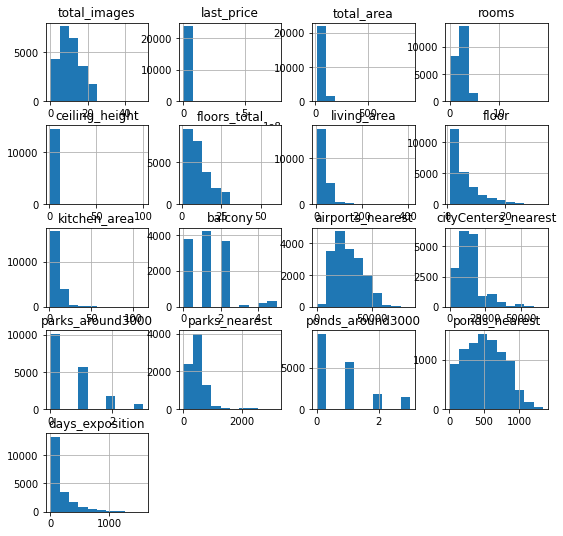

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
print(data.head(5))
data.info()
data.duplicated().sum()
data.describe()
data.hist(figsize=(9,9))
plt.show()

В исследуемом датасете данные о **23699 объектах недвижимости**. Однако, необходимо выполнить **предобработку данных:**
    - удалить/заполнить пропуски в 12 из 21 столбца;
    - изменить тип данных в 5 столбцах.
   

### 2. Предобработка данных

В первую очередь пройдемся по **пропущенным значениям** и заполним там, где это возможно.

In [2]:
data.isnull().sum()
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Начнем по порядку и поработаем с пропущенными данными в столбце **"ceiling_height"**.

In [3]:
print('Доля пропущенных значений в столбце ceiling_height составляет {:.0%}'\
      .format(len(data[data['ceiling_height'].isna()])/len(data)))

print(data['ceiling_height'].value_counts())

Доля пропущенных значений в столбце ceiling_height составляет 39%
2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


Из выведенных данных видим, что есть **нетипичные значения** (возможно, жилье элитное или внесены некорректные значения). чтобы заполнить пропуски можем использовать медианное значение, которое устоячиво к аномальным значениям.

In [4]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Данное сообщение - нормально, так как в данных содержатся категории по которым не сущесвуют медианы
Не получится обработать в цикле - на этом этапе предлагаю оставить как есть.

Посмотрим на долю пропущенных значений сразу в двух столбцах, где количество пропусков небольшое по сравнению с массивом.

In [5]:
print('Доля пропущенных значений в столбце floors_total составляет {:.1%}'\
      .format(len(data[data['floors_total'].isna()])/len(data)))

print('Доля пропущенных значений в столбце locality_name составляет {:.1%}'\
      .format(len(data[data['locality_name'].isna()])/len(data)))

Доля пропущенных значений в столбце floors_total составляет 0.4%
Доля пропущенных значений в столбце locality_name составляет 0.2%


Доля пропусков менее 0,5%, можем ими пренебречь и удалим данные сроки из датасета

In [6]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

In [7]:
print('Доля пропущенных значений в столбце kitchen_area составляет {:.1%}'\
      .format(len(data[data['kitchen_area'].isna()])/len(data)))
print('Доля пропущенных значений в столбце living_area составляет {:.1%}'\
      .format(len(data[data['living_area'].isna()])/len(data)))

Доля пропущенных значений в столбце kitchen_area составляет 9.4%
Доля пропущенных значений в столбце living_area составляет 7.9%


Данные о жилой площади и площади кухни человек/продавец не может не знать: эти данные находятся в **техническом паспорте квартиры**. Причина пропусков - человеческий фактор, техническая ошибка.

Для заполнения пропусков в столбцах 'living_area' и 'kitchen_area' рассчитаем не общую среднюю, а среднюю от количества комнат в квартире.
Но прежде убедимся, что нет нудевых значений в столбце 'rooms':

In [8]:
print((data['rooms']==0).value_counts())

False    23371
True       194
Name: rooms, dtype: int64


0-комнатных квартир не бывает. минимальное количество комнат -1. Чтобы заменить 0 на корректное значение, соотнесу количество комнат и жилую площадь:

In [9]:
print(data.pivot_table(index='rooms', values='living_area', aggfunc='mean'))

       living_area
rooms             
0        18.865246
1        17.899507
2        31.731865
3        47.374108
4        66.994806
5       100.009247
6       131.799796
7       163.564151
8       168.683333
9       190.257143
10      165.566667
11      133.900000
12      409.700000
14      195.150000
15      409.000000
16      180.000000
19      264.500000


Из сводной таблицы видно, что средняя площадь с нулевым значением количества комнат ~18кв.м. Делаю вывод, что можно безошибочно заменить 0 на 1 в столбце 'rooms':

In [10]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Теперь можно перейти к обработке пропусков в столбцах 'living_area' и 'kitchen_area':

In [11]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room)& (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].mean()
    
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room)& (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == room), 'kitchen_area'].mean()

Столбец "is_apartment" - булев тип, проверим заполнение:

In [12]:
print(data.groupby('is_apartment')['total_area'].count())

is_apartment
False    2710
True       50
Name: total_area, dtype: int64


Данный столбце считаю заполненным корректно: значение "True" получили квартиры, с типом "апартаменты", а пропущенные значения можем трактовать как отрицание типа "апартаменты"(при заполнении можно было игнорировать ячейку для заполнения).
Поэтому заполним пропуски значением "False" и приведем к нужному типу данных:

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [14]:
print('Доля пропущенных значений в столбце balcony составляет {:.0%}'\
      .format(len(data[data['balcony'].isna()])/len(data)))

Доля пропущенных значений в столбце balcony составляет 49%


Столбец "balcony" содержит информацию о числе балконов(следовательно, это целочисленное значение). 
Полагаю, что пропуски - это отсутствие балкона (пользователь мог игнорировать ячейку для заполнения)
Также заполним нулями и приведем сразу к нужному формату данных

In [15]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

Столбцы "parks_around3000" и "ponds_around3000" должны иметь целочисленные значения. Чтобы заменить пропуски на 0 (т.е отсутствие водоемов и парков поблизости) проверим, нет ли рядом парков и водоемов. Применим сводные таблицы:

In [16]:
print(data.pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc='min'))
print(data.pivot_table(index='parks_around3000', values='parks_nearest', aggfunc='min'))

                  ponds_nearest
ponds_around3000               
1.0                        20.0
2.0                        13.0
3.0                        22.0
                  parks_nearest
parks_around3000               
0.0                      3013.0
1.0                         1.0
2.0                         9.0
3.0                         4.0


Можем заменить пропущенные значения в обоих столбцах и привести к целочисленному формату 

In [17]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

Пропуски, на мой взгляд, которые могли обработать на данном этапе, обработали. Необходимо преобразовать столбец 'first_day_exposition'

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Для удобства анализа и восприятия это формат столбца **last_price**:

In [19]:
data['last_price'].min()

12190.0

Минимальное значение - 12190, можем изменить разряд суммы:

In [20]:
data['last_price'] = data['last_price']/1000
data.rename(columns = {'last_price': 'last_price_thousand'}, inplace=True)
data.head(5)

,total_images,last_price_thousand,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350.0,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,11.00000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900.0,159.0,2015-07-24,3,2.70,14,47.374108,9,False,...,11.29292,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Проверим результат всех преобразований

In [21]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price_thousand   23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

В датасете осталось **5 столбцов с пропущенными значениями**, которые самостоятельно изменить/дополнить/посчитать не смогу: из описания проекта следует, что имеется два типа данных: добавленные пользователем и картографические. 
К **картографическому** типу данных и  относятся необработанные столбцы: расстояния до центра города, аэропорта, ближайшего парка и водоема.
Для заполнения пропусков, возможно, на этом этапе можно **обратиться к специалистам**, которые смогли бы подтянуть данные.

что касается пропусков в столбце **days_exposition** то, полагаю, это актуальные объявления, по которым не было совершено еще сделки "купля-продажа".

Проверим явные дубликаты

In [22]:
data.duplicated().sum()

0

В столбце 'locality_name' проработаем неянвые дубликаты

In [23]:
print(data['locality_name'].duplicated().sum())
print(data['locality_name'].value_counts())

23201
Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
                     ...  
поселок Гончарово        1
поселок Рабитицы         1
посёлок Левашово         1
деревня Сижно            1
поселок Гаврилово        1
Name: locality_name, Length: 364, dtype: int64


In [24]:
data['locality_name'] = data['locality_name'].str.lower() 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#остаим в названии только имя собственное:
for i in data['locality_name'].unique().tolist():
    data.loc[data['locality_name'] == i, 'locality_name'] = i.split()[-1]
    
print(data['locality_name'].duplicated().sum())
print(data['locality_name'].value_counts())

23271
санкт-петербург    15651
мурино               586
кудрово              470
шушары               439
всеволожск           398
                   ...  
терпилицы              1
гладкое                1
тесово-4               1
алексеевка             1
счастье                1
Name: locality_name, Length: 294, dtype: int64


Проработала **неявные дубликаты:** - заменила ё на е - отсекла от наименования все приписки типа "деревня", "поселок" и тд. как итог: датафрейм **сократился на 36** уникальных наименований.

Проверим датасет на наличие аномальных значений и возможность их заменить/удалить.

In [25]:
data.describe()

,total_images,last_price_thousand,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18187.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6540.058260,60.322824,2.078888,2.733882,10.675875,34.442454,5.878124,10.550293,0.593677,28797.082701,14232.870319,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,10910.934722,35.657060,1.066503,1.012187,6.594823,21.822424,4.871485,5.643765,0.960660,12632.499735,8631.156866,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,12.190000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.300000,0.000000,18565.000000,9277.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4646.000000,52.000000,2.000000,2.700000,9.000000,30.300000,4.000000,9.544076,0.000000,26757.000000,13099.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6790.000000,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.600000,1.000000,37273.000000,16310.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


(12.0, 800000.0)

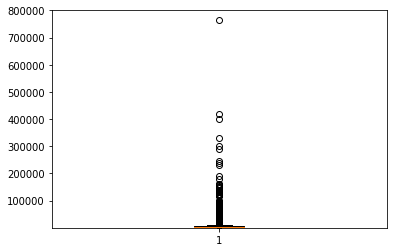

In [26]:
plt.boxplot(data['last_price_thousand'])
plt.ylim(12,800000)

Видим, что стоимость одной квартиры аномально высокая. В объеме имеющегося датасета, думаю, будет разумно не тратить время на поиски-замены, а просто исключить из анализа.

In [27]:
data = data[((data['last_price_thousand'] != 763000.000000))]

(1.0, 40.0)

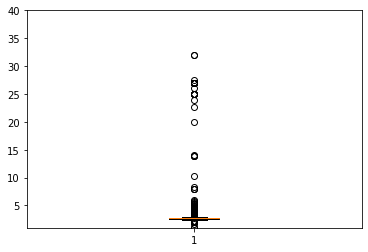

In [28]:
plt.boxplot(data['ceiling_height'])
plt.ylim(1,40)

Со значениями высоты потолков что-то не так. При среднем в 2,7 видим, что значения находятся в диапазоне от 1 до 100м.
а также в датасете присутствуют потолки выше 10 метров. Предполагаю, что в процессе заполнения данных пользователь перепутал ячейки и вместо высоты потолка было внесено значение другого параметра (13,85м больше похоже на площадь, чем высоту)
Подобную ошибку можно недопустить в процессе заполнения путем присвоения ячейке ограничения: не может потолок быть высотой как 1 метр, так и 20, и 100 (если мы не говорим о каком-то супер элитном жилье...но это скорее всего будет не квартира).

В интернете (ссылку прикрепляю) нашла статью с информацией о том, что высота потолков 4-7м для Питера - это ок.
Поэтому, при прочих равных все, что выше 8м - заменю медианой относительно района.

ссылка: https://asninfo.ru/comfortlive/210-samyye-bolshiye-kvartiry-sankt-peterburga

In [29]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'] >= 8) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    data.loc[(data['ceiling_height'] <=1) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    
data.loc[data['ceiling_height'] >= 8, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] <= 1, 'ceiling_height'] = data['ceiling_height'].median()

(1.0, 7.0)

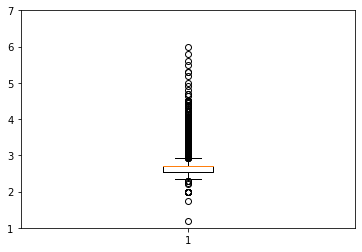

In [30]:
plt.boxplot(data['ceiling_height'])
plt.ylim(1,7)

Стоит проверить столбец общее количество этажей в доме.

(1.0, 60.0)

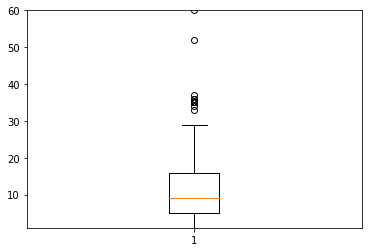

In [31]:
plt.boxplot(data['floors_total'])
plt.ylim(1,60)

Вижу, что выбивающихся значения: 52 и 60 этажей в доме, посмотрим, что за они:

In [32]:
print(data.loc[data.loc[:,'floors_total']>50]['locality_name'])

2253           кронштадт
16731    санкт-петербург
Name: locality_name, dtype: object


Дом с этажностью в 52 этажа в Санкт-Петербурге -ок.
Кронштадт вызывает сомнения. Возможно, что лишний 0 был при заполнении и дом 6-этажный.
Не хотелось бы гадать и, если нет возможности уточнить, то 1 строку удалим из анализа.

In [33]:
data = data[((data['floors_total'] != 60))]

Сделаем проверку на наличие аномальных

В данном блоке были **выполнены замены пропущенных значений:**
    *удалены строки с пропущенными значениями, т.к. ими можно было пренебречь:*
        - locality_name
        - floors_total
    *заменены логически:*
        - is_apartment
        - balcony
        - parks_around3000 
        - ponds_around3000
    *заменены медианными и средними значениями:*
        - ceiling_height
        - living_area 
        - kitchen_area

Причины пропусков вижу следующие:
    - **отсутствие признака обязательного заполнения ячейки** (например, площадь кухни, высота потолка - это параметры, которые нельзя не знать);
    - **отсутствие автоматического заполнения ячеек** (в датасете есть данные, которые могут заполняться автоматически при внесении, например, адреса);
    - **человеческий фактор** (пропуск при заполнении, незнание, осознанный пропуск: человек посчитал, что строка "airports_nearest" не такой и важный).

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем **цену одного квадратного метра**

In [34]:
data['sm_price'] = data['last_price_thousand'] / data['total_area']

Добавим **день недели, месяц и год**  публикации объявления

In [35]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим **тип этажа** квартиры (значения — «первый», «последний», «другой»)

In [36]:
def floor_group(floors):
    if floors['floor'] == 1:
        return 'первый'
    elif floors['floor'] == floors['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Добавили **расстояние до центра города в километрах** (для обработки данных заменила пропуски на 0, затем перевела в километры)

In [37]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)
data['cityCenters_distance'] = (data['cityCenters_nearest']/1000).astype(int)

Обновим общую информацию о дополненном датасете:

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price_thousand   23563 non-null  float64       
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23563 non-null  int64         
 7   living_area           23563 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          23563 non-null  bool          
 10  studio                23563 non-null  bool          
 11  open_plan             23563 non-null  bool          
 12  kitchen_area          23563 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

Изучим следующие параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

count    23563.000000
mean        60.309037
std         35.589709
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


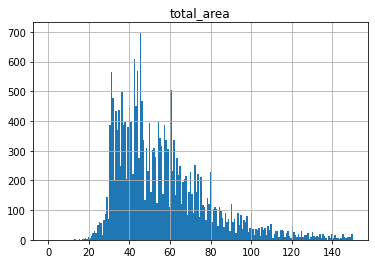

In [39]:
print(data['total_area'].describe())
data.hist('total_area', range = (0,150), bins=200)
plt.show()

Площади объектов недвижимости находятся в диапазоне от **12кв.м до 900кв.м.**
Однако, только четверть предложений - это недвижимость с площадью более 69 кв.м., подавляющая часть предложений - это площадь от 40 до 69 кв.м.

count     23563.000000
mean       6508.070827
std        9735.042439
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      420000.000000
Name: last_price_thousand, dtype: float64


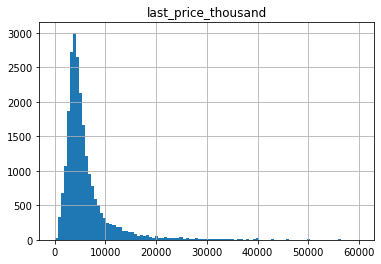

In [40]:
print(data['last_price_thousand'].describe())
data.hist('last_price_thousand', range=(0,60000), bins=100)
plt.show()

Гистаграмма цен дублирует гистограму площадей: цена находится в прямой зависимости от площади недвижимости.

count    23563.000000
mean         2.078683
std          1.066066
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


1     8198
2     7896
3     5779
4     1172
5      325
6      104
7       58
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

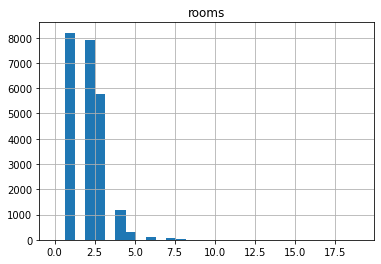

In [41]:
print(data['rooms'].describe())
data.hist('rooms', range=(0,19), bins=30) 
data['rooms'].value_counts()

Число комнат в исследуемом датасете варьируется от 1 до 19.
На гистограмме видно, что подавляющее большинство объявлений - это продажа 1, 2, 3 комнатных квартир.

count    23563.000000
mean         2.703716
std          0.226160
min          1.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


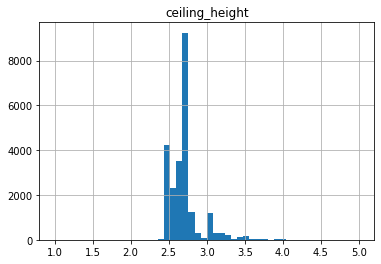

In [42]:
print(data['ceiling_height'].describe())
data.hist('ceiling_height', range=(1,5), bins=50) 
plt.show()

Потолки у большинства объявлений имеет среднюю высоту потолков

count    23563.000000
mean         5.878029
std          4.871603
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


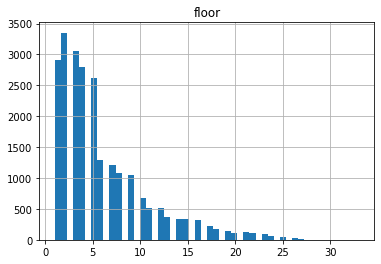

In [43]:
print(data['floor'].describe())
data.hist('floor', range=(1,33), bins=50) 
plt.show()

Подавляющее количество объектов недвижимости в объявлениях располагается ниже 8 этажа. Думаю, это связано  с тем, что в продаже большинство квартир - это старые постройки (могли бы увидеть, если  бы в датасете был столбец с информацией о годе постройки). 

count      23563
unique         3
top       другой
freq       17325
Name: floor_type, dtype: object


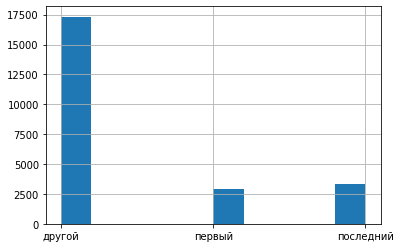

In [44]:
print(data['floor_type'].describe())
data['floor_type'].hist()
plt.show()

Большинство квартир из объявлений находится не на первом и не на последнем этажах.

count    23563.000000
mean        10.673811
std          6.587269
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64


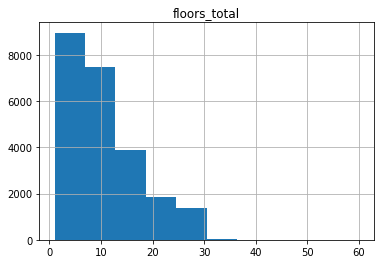

In [45]:
print(data['floors_total'].describe())
data.hist('floors_total', range=(1, 60), bins=10) 
plt.show()

Данная гистограмма подтверждает гипотезу о том, что в объявлениях подавляющее большинство квартир советской застройки, у которых этажность не превышает 9.

count    23563.000000
mean        10.600730
std          9.524948
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: cityCenters_distance, dtype: float64


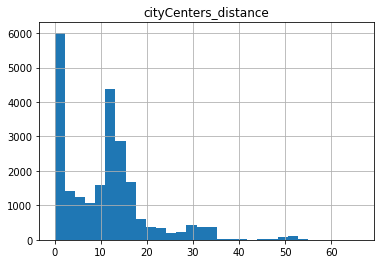

In [46]:
print(data['cityCenters_distance'].describe())
data.hist('cityCenters_distance', range=(0, 66), bins=30) 
plt.show()

На первый взгляд, подавляющее большинство квартир находится относительно близко к центру (~15км), однако, нельзя не отметить, что датасет содержит объявления не только по Санкт-Петербургу, но и соседних населенных пунктах, которые несоизмеримо меньше площади Санкт-Перербурга. Рассмотрим раздельно:

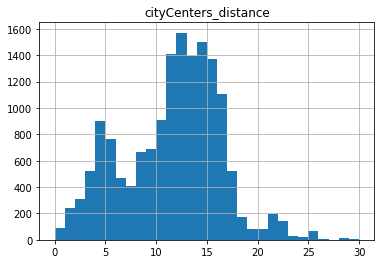

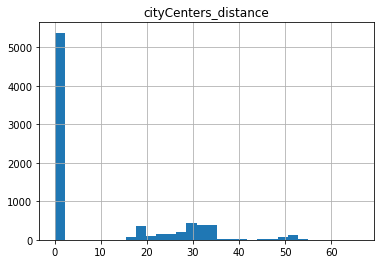

In [47]:
(data
    .query('locality_name == "санкт-петербург"')
    .hist('cityCenters_distance', range=(0, 30), bins=30) 
) 

(data
    .query('locality_name != "санкт-петербург"')
    .hist('cityCenters_distance', range=(0, 66), bins=30) 
) 
plt.show()

Считаю, что гипотеза подтвердилась: в соседних населенных пунктах объекты недвижимости находятся в самом центре.

count    18039.000000
mean     28795.127113
std      12629.838096
min          0.000000
25%      18561.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


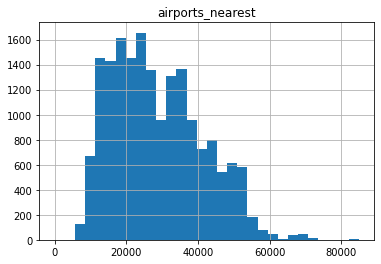

In [48]:
print(data['airports_nearest'].describe())
data.hist('airports_nearest', range=(0, 85000), bins=30) 
plt.show()

Большинство объектов недвижимости находится не более, чем в 40км от аэропорта.

count    8028.000000
mean      490.594046
std       341.611197
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


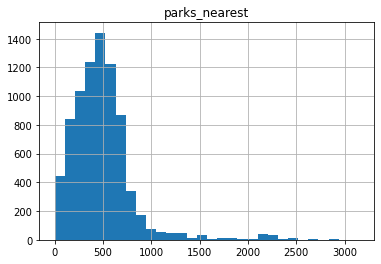

In [49]:
print(data['parks_nearest'].describe())
data.hist('parks_nearest', range=(1, 3150), bins=30) 
plt.show()

Близость к парку является положительным критерием при покупке квартиры. Однако, в нашем датасете данная графа требует дороботки и полного заполнения.
По имеющимся данным можно отметить, что 75% квартир (из 8030 объявлений) находятся не далее, чем 612 метров от парка.
Максимальное расстроение до парка более 3км

count    23563.000000
mean         2.567245
std          1.788283
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


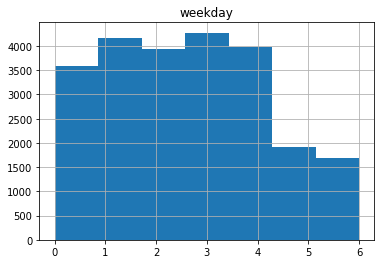

In [50]:
print(data['weekday'].describe())
data.hist('weekday', range=(0,6), bins=7) 
c

Из гистограммы видно, что объявления публиковались равномерно в течение рабочей недели. на выходных объявления публиковались почти в 2 раза меньше.
Можно утверждать/предположить, что объявления публикуют не только частные лица/собственники, но и агенства недвижимости, у которых нормированный рабочий день (если можно так сказать).

count    23563.000000
mean         6.401477
std          3.493054
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


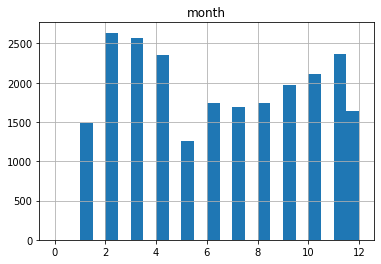

In [51]:
print(data['month'].describe())
data.hist('month', range=(0,12), bins=24) 
plt.show()

С учетом того, что данные собраны за период с 2014 по 2019 год, можно сказать, что:
    февраль, март, апрель - самые высокие месяцы по предложениям продажи квартир
    январь, май - самые низкие месяцы.

Все исследуемые показатели имеют **нормальное распределение**.

В среднем продажа квартиры занимает 181 дней
Половина квартир в выборке была продана менее, чем за  95 дня
count    20392.000000
mean       180.749362
std        219.741098
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


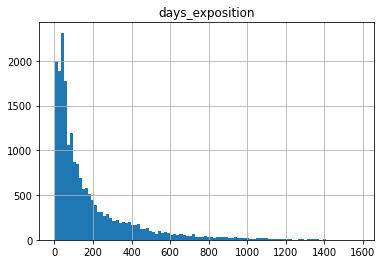

In [52]:
data.hist('days_exposition', bins=100) 
print('В среднем продажа квартиры занимает', round(data['days_exposition'].mean()), 'дней')
print('Половина квартир в выборке была продана менее, чем за ',round(data['days_exposition'].median()), 'дня')
print(data['days_exposition'].describe())

Продажа квартиры в Санкт-Петербурге и соседних населённых пунктах занимает **180 дней**
Половина квартир была продана за **95 дней**.

Продажи можно считать быстрыми, если сделка "купля-продажа" была осуществена **до 45 дней** с момента размещения объявления, а продажи более **231 дня** — необычно долгими.

Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

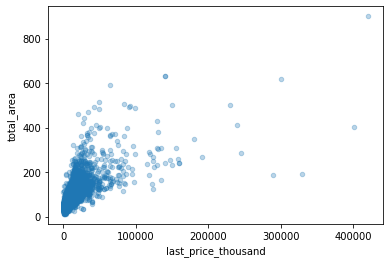

In [53]:
data.plot(x='last_price_thousand', y='total_area', kind='scatter', alpha=0.3)
plt.show()

Видна прямая зависимость между общей площади и ценой на квартиру

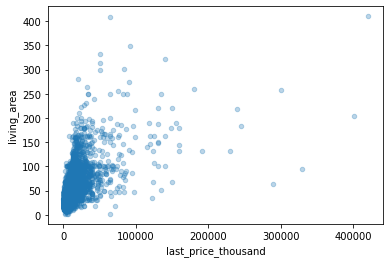

In [54]:
data.plot(x='last_price_thousand', y='living_area', kind='scatter', alpha=0.3) 
plt.show()

Площадь кухни влияет на стоимость квартиры.

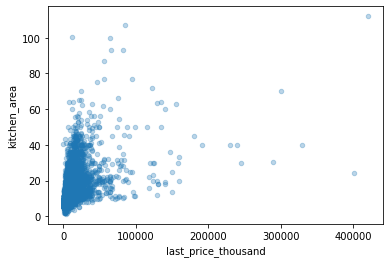

In [55]:
data.plot(x='last_price_thousand', y='kitchen_area', kind='scatter', alpha=0.3) 
plt.show()

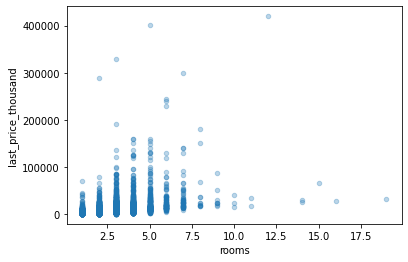

In [56]:
data.plot(x='rooms', y='last_price_thousand', kind='scatter', alpha=0.3)
plt.show()

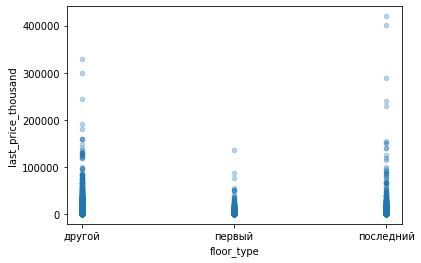

In [57]:
data.plot(x='floor_type', y='last_price_thousand', kind='scatter', alpha=0.3) 
plt.show()

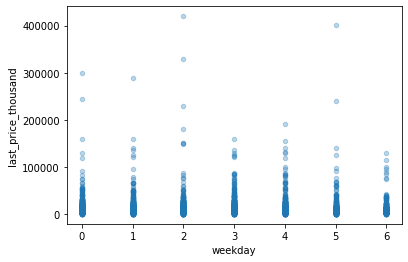

In [58]:
data.plot(x='weekday', y='last_price_thousand', kind='scatter', alpha=0.3)
plt.show()

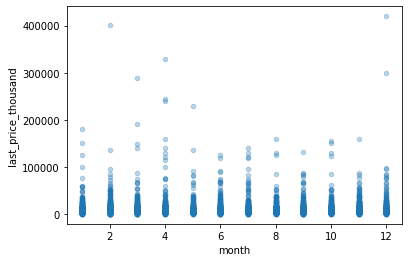

In [59]:
data.plot(x='month', y='last_price_thousand', kind='scatter', alpha=0.3) 
plt.show()

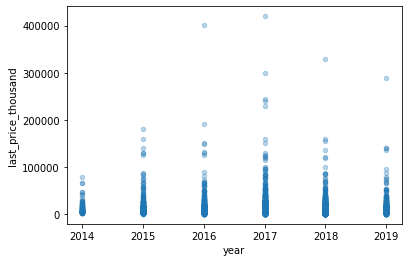

In [60]:
data.plot(x='year', y='last_price_thousand', kind='scatter', alpha=0.3) 
plt.show()

Построив графики, видно, что цена зависит в большей степени от общей площади квартиры.
Чтобы отцифровать зависимость, предлагаю посмотреть на коэффициенты корреляции:

In [61]:
print('Корреляция цены и общей площади', data['last_price_thousand'].corr(data['total_area']))
print('Корреляция цены и жилой площади', data['last_price_thousand'].corr(data['living_area']))
print('Корреляция цены и площади кухни', data['last_price_thousand'].corr(data['kitchen_area']))
print('Корреляция цены и количества комнат', data['last_price_thousand'].corr(data['rooms']))
print('Корреляция цены и даты размещения', data['last_price_thousand'].corr(data['weekday']))
print('Корреляция цены и месяца размещения', data['last_price_thousand'].corr(data['month']))   
print('Корреляция цены и года размещения', data['last_price_thousand'].corr(data['year']))

Корреляция цены и общей площади 0.7025385859021818
Корреляция цены и жилой площади 0.5923003004542302
Корреляция цены и площади кухни 0.5068238044922528
Корреляция цены и количества комнат 0.3941173077148042
Корреляция цены и даты размещения -0.002962561394982542
Корреляция цены и месяца размещения 0.000600681018216489
Корреляция цены и года размещения -0.046857605525329284


Что и требовалось доказать: наблюдается высокая степень зависимости между полной стоимостью объекта и общей площади.
Дата, месяц, год никак не влияют на стоимость квартиры.

Посмотрим еще под другим ракурсом зависимость цены от количества комнат, типа этажа, даты, месяца и года размещения: построим сводные таблицы, в которых рассчитаем среднюю стоимость квадратного метра и сгруппируем по интересующим факторам

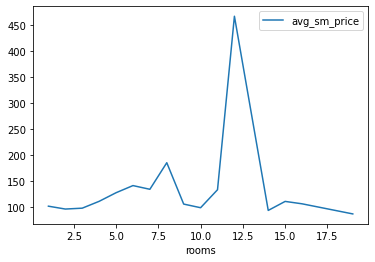

In [62]:
rooms_pivot = data.pivot_table(index='rooms', values='sm_price', aggfunc='mean')
rooms_pivot.columns = ['avg_sm_price']
rooms_pivot.plot(y='avg_sm_price')
plt.show()

 12-комнатная квартира - самая дорогая в имеющимся датасете. Хочется посмотреть на нее, а именно причины, по которым стоимость квадратного метра в разы выше остальных.

In [63]:
print(data.query('rooms == 12'))

       total_images  last_price_thousand  total_area first_day_exposition  \
19540             8             420000.0       900.0           2017-12-06   

       rooms  ceiling_height  floors_total  living_area  floor  is_apartment  \
19540     12             2.8            25        409.7     25         False   

       ...  parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
19540  ...            NaN                 2          318.0            106.0   

         sm_price  weekday  month  year  floor_type  cityCenters_distance  
19540  466.666667        2     12  2017   последний                     7  

[1 rows x 28 columns]


Центр города, 25 последний этаж, 900кв.м. - общая площадь, 409,7 - жилая, очень похоже, что данная квартира типа пентхаус (возможно, с бассейном и, уж точно, с подземной парковкой), нельзя не отметить, что это жилье можно отнести к эдитному.

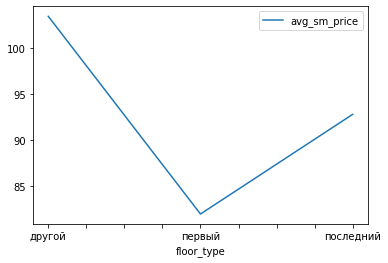

In [64]:
floor_pivot = data.pivot_table(index='floor_type', values='sm_price', aggfunc='mean')
floor_pivot.columns = ['avg_sm_price']
floor_pivot.plot(y='avg_sm_price')
plt.show()

Ожидаемо, что квартиры на первом этаже - самые недорогие.

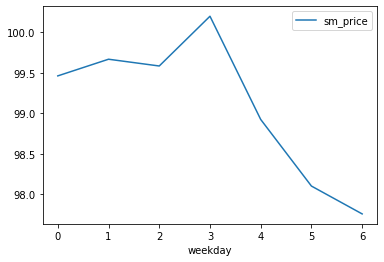

In [65]:
weekday_pivot = data.pivot_table(index='weekday', values='sm_price', aggfunc='mean')
weekday_pivot.columns = ['sm_price']
weekday_pivot.plot(y='sm_price')
plt.show()

По графику можно сказать, что средняя стоимость падает к концу недели, при пиковом значении в четверг.

Но я бы не выдвигала какие-либо гипотезы по данной зависимости, так как считаю, что ее нет.
Правильная оценка жилья (учет квардратного метра, расположения, наличия парковок, близость к метро, инфраструктура рядом) не позволит дню недели влиять на стоимость жилья.

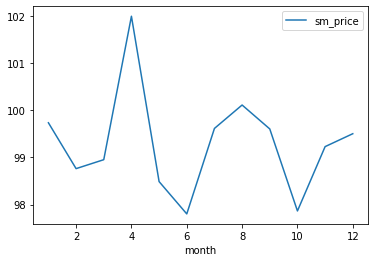

In [66]:
month_pivot = data.pivot_table(index='month', values='sm_price', aggfunc='mean')
month_pivot.columns = ['sm_price']
month_pivot.plot(y='sm_price')
plt.show()

пиковый месяц по стоимости квадратного метра -это апрель, но, что, если посмотреть отдельно на Санкт-Петербург и на остальные.

<AxesSubplot:xlabel='month'>

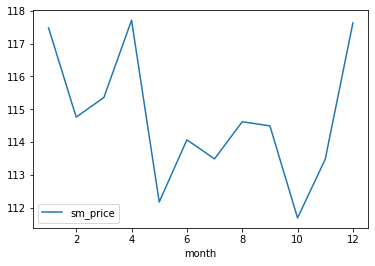

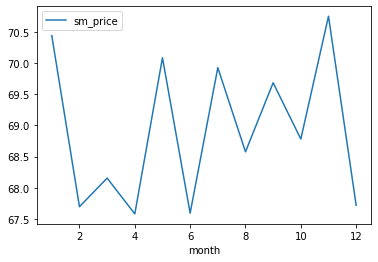

In [67]:
(data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='month', values='sm_price', aggfunc='mean')
    .plot(y='sm_price')
) 

(data
    .query('locality_name != "санкт-петербург"')
    .pivot_table(index='month', values='sm_price', aggfunc='mean')
    .plot(y='sm_price')
) 

Апрель и декабрь - пики в Санкт-Петербурге по стоимости квартир. Возможно, в апреле (весной) хочется обновлений, улучшений жилищных условий, декабрь - время начинать "новую жизнь", время подарков.
На самом деле, сложно рассуждать, так как не могу привести логические доводы. Возможно, просто стоит принять данную информацию и учесть при купле-продаже квартир.

        sm_price
year            
2014  124.302356
2015  104.640330
2016   98.291798
2017   97.416325
2018   97.764394
2019  107.047268


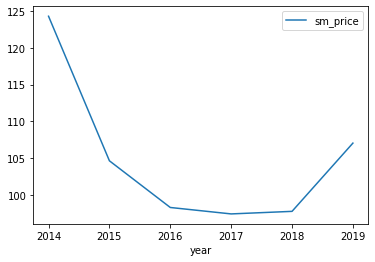

In [68]:
year_pivot = data.pivot_table(index='year', values='sm_price', aggfunc='mean')
year_pivot.columns = ['sm_price']
year_pivot.plot(y='sm_price')
print(year_pivot)
plt.show()

Очень показательный график, я считаю.
Средняя стоимость квадратного метра **упала со 124,3 до 97** за три года. Думаю, прежде всего это связано с обесцениванием российского рубля, а также с увеличением предложений в связи с внешнеполитической ситуацией.
с 2018 года видим рост, но интересно будет посмотреть на динамику в 2019-2020 годах - время коронавируса и карантина, думаю, не прошли незаметно для рынка недвижимости.

      last_price_thousand
year                     
2014         12046.600176
2015          8595.668902
2016          6829.116559
2017          6489.831350
2018          5954.319203
2019          6779.323626


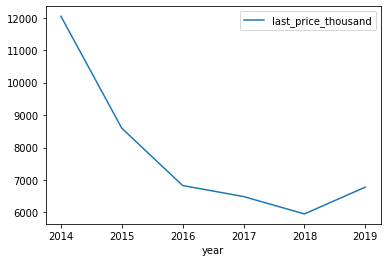

      total_area
year            
2014   86.225956
2015   71.584563
2016   62.129938
2017   60.655945
2018   57.703331
2019   59.475991


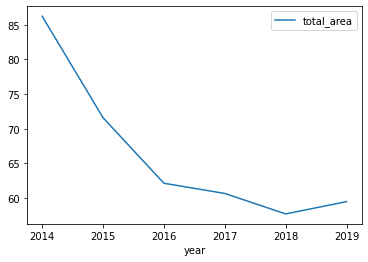

In [69]:
year_pivot_n = data.pivot_table(index='year', values='last_price_thousand', aggfunc='mean')
year_pivot_n.columns = ['last_price_thousand']
year_pivot_n.plot(y='last_price_thousand')
print(year_pivot_n)
plt.show()

area_pivot = data.pivot_table(index='year', values='total_area', aggfunc='mean')
area_pivot.columns = ['total_area']
area_pivot.plot(y='total_area')
print(area_pivot)

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [70]:
city = data.pivot_table(index='locality_name', values='sm_price', aggfunc=['count', 'median'])
city.columns=['count', 'sm_price']
city.sort_values(by='count', ascending=False).head(10)

,count,sm_price
locality_name,,
санкт-петербург,15650,104.772401
мурино,586,86.250378
кудрово,470,95.555312
шушары,439,76.829268
всеволожск,398,65.789474
пушкин,369,100.000000
колпино,338,74.723748
парголово,327,91.642857
гатчина,307,67.796610


Был составле **ТОП10** населённых пунктов с наибольшим числом объявлений. Самым большим по количеству и по средней цене квадратного метра стал, ожидаемо, **Санкт-Перербург.**
**Выборг**  занял последнее место в ТОП10 как по количеству объявлений, так и по цене.

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [71]:
spb = data.query('(locality_name == "санкт-петербург") & (cityCenters_nearest >0)').copy()
spb['km_to_centre'] = spb['cityCenters_distance']
spb_pivot = spb.pivot_table(index='km_to_centre', values='sm_price', aggfunc='mean')
print(spb_pivot)

                sm_price
km_to_centre            
0             187.324130
1             166.603756
2             146.662860
3             126.127369
4             137.413428
5             146.978313
6             152.277894
7             141.399731
8             120.539122
9             110.027821
10            111.490163
11            106.618359
12            110.130337
13            107.140842
14            104.979537
15            101.859811
16            100.083326
17             94.666410
18             94.814964
19             95.434377
20            107.046166
21             91.492688
22             88.714697
23             92.720642
24             82.440344
25             90.436946
26             75.171911
27            132.115709
28             81.840639
29             62.482404


По выведенной таблице видно, что средняя стоимость квадрата в Санкт-Петербурге падает отдаляясь от центра. посмотрим на графике:

AxesSubplot(0.125,0.125;0.775x0.755)


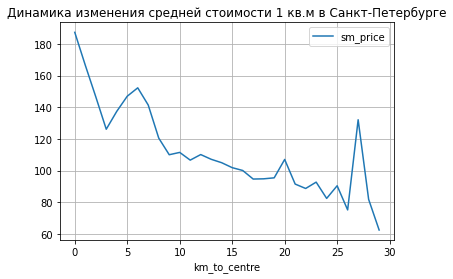

In [72]:
print(spb_pivot.plot(grid = True, title = 'Динамика изменения средней стоимости 1 кв.м в Санкт-Петербурге'));
plt.show()

Можно сказать, что удаленность от центра более 5 км влиет в меньшей степени, более 10 км - имеет незначительное влияение.
Обозначим центр города - радиус в 5 км.

### Общий вывод

    Для работы были получены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
    
    На первом этапе была выполнена **предобработка данных**: заполнили пропуски данных, а также привели типа данных в соответсвующий тип. Для повышения качества содержания датасета были предложены рекомендации: автоматическое заполнение, присвоение ячейкам признака обязательного заполнения.
    
    На втором этапе выполнили расчеты и дополнили датасет:
        цена одного квадратного метра;
        день недели публикации объявления;
        месяц публикации объявления;
        год публикации объявления;
        тип этажа квартиры;
        расстояние до центра города в километрах.
        
    Третьим этапом был проведен исследовательский анализ: изучены следующие параметры объектов и построены гистограммы.
        общая площадь;
        жилая площадь;
        площадь кухни;
        цена объекта;
        количество комнат;
        высота потолков;
        этаж квартиры;
        тип этажа квартиры;
        общее количество этажей в доме;
        расстояние до центра города в метрах;
        расстояние до ближайшего аэропорта;
        расстояние до ближайшего парка;
        день и месяц публикации объявления.
    Наиболее значимые факторы для стоимости квартиры: это общая площадь и тип этажа. Но для более глубоко анализа считаю, что датасет можно дополнить данными: наличие парковки, инфраструктура (школа/сад/поликлиника/магазины), удаленность от метро, год постройки дома.

    Далее был свормирован ТОП10 населённых пунктовс наибольшим числом объявлений: Санкт-Петербург и Выборг заняли первое и последнее место соответственно.
    Также были выделены квартиры в Санкт-Петербурге и вычислена средняя цена каждого километра: можем сказать, что квартира в центре Санкт-Петербурга -это квартира, которая находится в радиусе 5 км, каждый дополнительный километр значительно влияет на стоимость квадратного метра.